In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
print(data.shape)

(7973, 31)


In [7]:
data.isnull().values.any()

True

In [9]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
print(fraud.shape,valid.shape)

(25, 31) (7947, 31)


In [60]:
X = data[['Time','Amount']]
Y = data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(7973, 2)
(7973,)


In [22]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 40)

In [23]:
import pandas as pd
xTrain_df = pd.DataFrame(xTrain)
missing_values = xTrain_df.isnull().sum()
print(missing_values)

0    0
1    1
dtype: int64


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(xTrain)
xTrain = imputer.transform(xTrain)
xTest = imputer.transform(xTest)

In [25]:
!pip install numpy
import numpy as np

In [26]:
nan_count = np.count_nonzero(np.isnan(yTrain))
if nan_count > 0:
    print("yTrain contains NaN values.")

yTrain contains NaN values.


In [61]:
yTrain = yTrain[~np.isnan(yTrain)]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
yTrain = imputer.fit_transform(yTrain.reshape(-1, 1)).ravel()

In [29]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [33]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)

(6378, 2)
(6378,)
(1595, 2)


In [34]:
print(np.isnan(xTrain).sum())
print(np.isnan(yTrain).sum())
print(np.isnan(xTest).sum())

0
1
0


In [62]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

xTrain = knn_imputer.fit_transform(xTrain)
xTest = knn_imputer.transform(xTest)

from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy="mean")

yTrain = simple_imputer.fit_transform(yTrain.reshape(-1, 1)).ravel()

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
yTrain = le.fit_transform(yTrain)

In [38]:
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [39]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(yTest, yPred)
print("The accuracy of Render forest is {}".format(acc))

The accuracy of Render forest is 0.993103448275862


In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xTrain, yTrain)
yPred=gnb.predict(xTest)
acc = accuracy_score(yTest, yPred)
print("The accuracy of Naive Bayes is {}".format(acc))

The accuracy of Naive Bayes is 0.9949843260188088


In [41]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(xTrain, yTrain)
yPred=dummy.predict(xTest)
acc = accuracy_score(yTest, yPred)
print("The accuracy of Dummy Classifier is {}".format(acc))

The accuracy of Dummy Classifier is 0.9949843260188088


In [42]:
 from sklearn.svm import SVC
svm = SVC()
svm.fit(xTrain, yTrain)
yPred=svm.predict(xTest)
acc = accuracy_score(yTest, yPred)
print("The accuracy of SVM is {}".format(acc))

The accuracy of SVM is 0.9949843260188088


In [43]:
print(fraud.shape)

(25, 31)


In [44]:
data1 = data.sample(frac=1)
fraud_data1 = data1.loc[data1['Class'] == 1]
non_fraud_data1 = data1.loc[data1['Class'] == 0][:492]

normal_distributed_data1 = pd.concat([fraud_data1, non_fraud_data1])
new_data1 = normal_distributed_data1.sample(frac=1, random_state=42)

new_data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4752,4196,-2.031015,-0.594523,2.111648,0.778915,2.309889,0.436218,-0.319788,0.538035,0.909764,...,0.049542,0.181097,0.116846,-0.686607,0.447155,-0.353582,0.026624,0.074373,32.36,0.0
7281,9726,-0.459744,0.879462,2.375614,0.943133,0.153053,1.062495,-0.000541,-0.171852,1.503606,...,-0.282243,-0.198606,-0.423094,-0.983384,0.103947,0.592509,-0.347143,-0.156162,6.99,0.0
29,23,1.059387,-0.175319,1.266130,1.186110,-0.786002,0.578435,-0.767084,0.401046,0.699500,...,0.013676,0.213734,0.014462,0.002951,0.294638,-0.395070,0.081461,0.024220,12.99,0.0
1385,1074,-0.295594,1.022747,1.534593,-0.189536,0.417759,-0.545109,0.998968,-0.327714,-0.409308,...,-0.293893,-0.556324,-0.123407,-0.099532,-0.108294,0.069227,0.107248,-0.103839,8.97,0.0
5140,4833,1.021000,-0.083708,1.055318,1.605248,-0.289435,1.108695,-0.685134,0.406702,1.973717,...,-0.157535,0.124962,-0.040400,-0.339393,0.464752,-0.282935,0.054502,0.002592,15.00,0.0


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

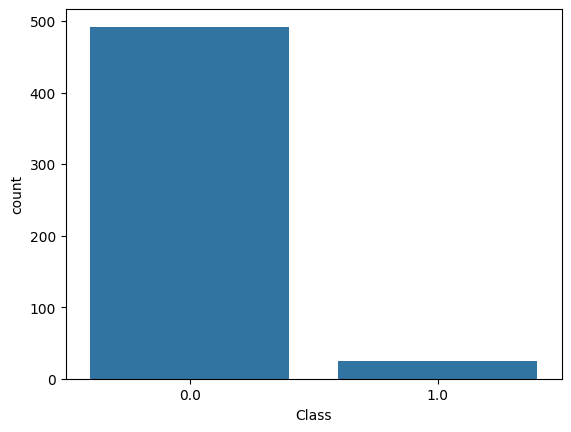

In [53]:
sns.countplot(data=new_data1, x="Class")
plt.show()

In [56]:
X = new_data1[['Time','Amount']]
Y = new_data1["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(517, 2)
(517,)


In [57]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 40)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [59]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(yTest, yPred)
print("The accuracy of Render forest is {}".format(acc))

The accuracy of Render forest is 0.9807692307692307
